In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
X_train=pd.read_csv('E:/Coding-Lane-Assets/Logistic Regression in Python from Scratch/train_X.csv')
Y_train=pd.read_csv('E:/Coding-Lane-Assets/Logistic Regression in Python from Scratch/train_Y.csv')
X_test=pd.read_csv('E:/Coding-Lane-Assets/Logistic Regression in Python from Scratch/test_X.csv')
Y_test=pd.read_csv('E:/Coding-Lane-Assets/Logistic Regression in Python from Scratch/test_Y.csv')

In [3]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [5]:
X_train=X_train.drop('Id',axis=1)
Y_train=Y_train.drop('Id',axis=1)
X_test=X_test.drop('Id',axis=1)
Y_test=Y_test.drop('Id',axis=1)

In [6]:
X_train=X_train.values
Y_train=Y_train.values
X_test=X_test.values
Y_test=Y_test.values

In [7]:
X_train=X_train.T
Y_train=Y_train.reshape(1,X_train.shape[1])
X_test=X_test.T
Y_test=Y_test.reshape(1,X_test.shape[1])

In [11]:
X_train.shape
Y_test.shape

(1, 418)

In [15]:
np.exp(2)

7.38905609893065

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [21]:
def model(X,Y,learning_rate,iterations):
    m=X_train.shape[1] #number of observations
    n=X_train.shape[0] # number of featuers
    W=np.zeros((n,1))
    B=0
    cost_li=[]
    for i in range(iterations):
        z=np.dot(W.T,X)+B
        A=sigmoid(z)
        cost=-(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
        dw=(1/m)*np.dot(A-Y,X.T)
        db=(1/m)*np.sum(A-Y)
        W=W-learning_rate*dw.T
        B=B-learning_rate*db
        cost_li.append(cost)
        if(i%(iterations/10)==0):
            print("Cost after",i,"iterations :",cost)
            
        
        
    return W,B,cost_li
        
        
        
    

In [26]:
W,B,Cos=model(X_train,Y_train,learning_rate=0.0015,iterations=1000)

Cost after 0 iterations : 0.6931471805599454
Cost after 100 iterations : 0.623155114769506
Cost after 200 iterations : 0.61840847117564
Cost after 300 iterations : 0.6141493540385256
Cost after 400 iterations : 0.6102987743134621
Cost after 500 iterations : 0.6067906069075385
Cost after 600 iterations : 0.6035698026303276
Cost after 700 iterations : 0.6005907135914306
Cost after 800 iterations : 0.5978155878637558
Cost after 900 iterations : 0.5952132539127585


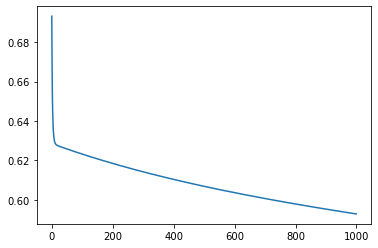

In [27]:
plt.plot(np.arange(1000),Cos)

In [28]:
def accuray(X,Y,W,B):
    Z=np.dot(W.T,X)+B
    A=sigmoid(Z)
    A=A>0.5
    A=np.array(A,dtype='int64')
    acc=(1-np.sum(np.absolute(A-Y))/Y.shape[1])*100
    print("Accuracy of the model",acc,'%')
    

In [29]:
accuray(X_test,Y_test,W,B)

Accuracy of the model 65.78947368421053 %


In [ ]:
from sklearn.linear_model import LogisticRegression